<a href="https://colab.research.google.com/github/venkat994288/venkadeshairquality11thproject/blob/main/Predict_AirQualityVenkadesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
import pandas as pd

df = pd.read_csv("air_quality_data.csv")

Saving air_quality_data.csv to air_quality_data.csv


In [ ]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicate rows if any
df = df.drop_duplicates()

# Final shape of data
print("Cleaned Data Shape:", df.shape)

Missing values:
 City     0
PM2.5    0
PM10     0
NO2      0
AQI      0
dtype: int64
Cleaned Data Shape: (5, 5)


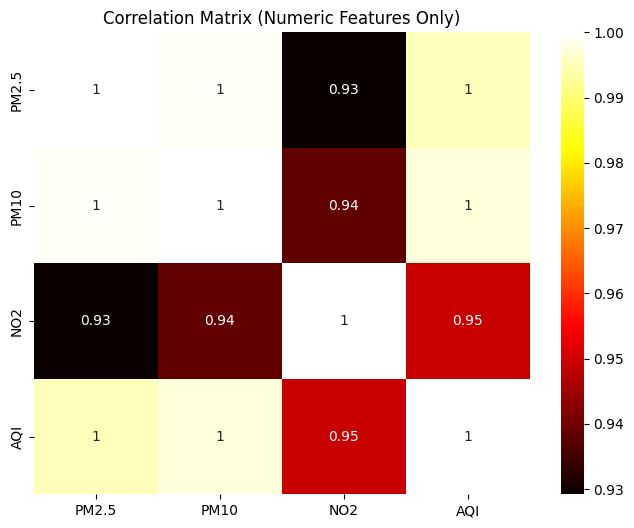

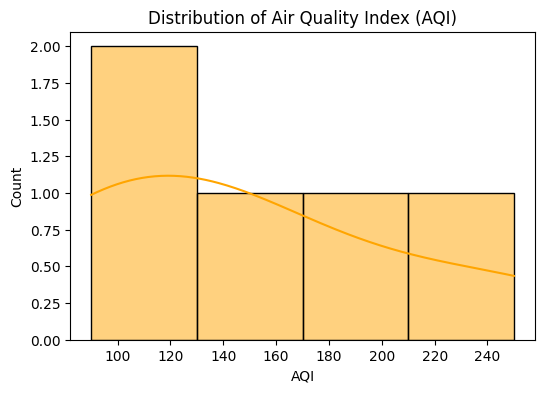

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="hot")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

#ko Distribution of AQI
plt.figure(figsize=(6, 4))
sns.histplot(df['AQI'], kde=True, color='orange')
plt.title("Distribution of Air Quality Index (AQI)")
plt.xlabel("AQI")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Separate features and target
X = df.drop('AQI', axis=1)
y = df['AQI']

# One-hot encode categorical columns (automatically detects object/string columns)
X_encoded = pd.get_dummies(X)

# Split the encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

print("Model training completed successfully")

Model training completed successfully


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Linear Regression Evaluation
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R² Score:", r2_score(y_test, lr_preds))

# Decision Tree Evaluation
print("\nDecision Tree Regressor")
print("MAE:", mean_absolute_error(y_test, dt_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_preds)))
print("R² Score:", r2_score(y_test, dt_preds))

Linear Regression
MAE: 2.4249553400537707
RMSE: 2.4249553400537707
R² Score: nan

Decision Tree Regressor
MAE: 30.0
RMSE: 30.0
R² Score: nan


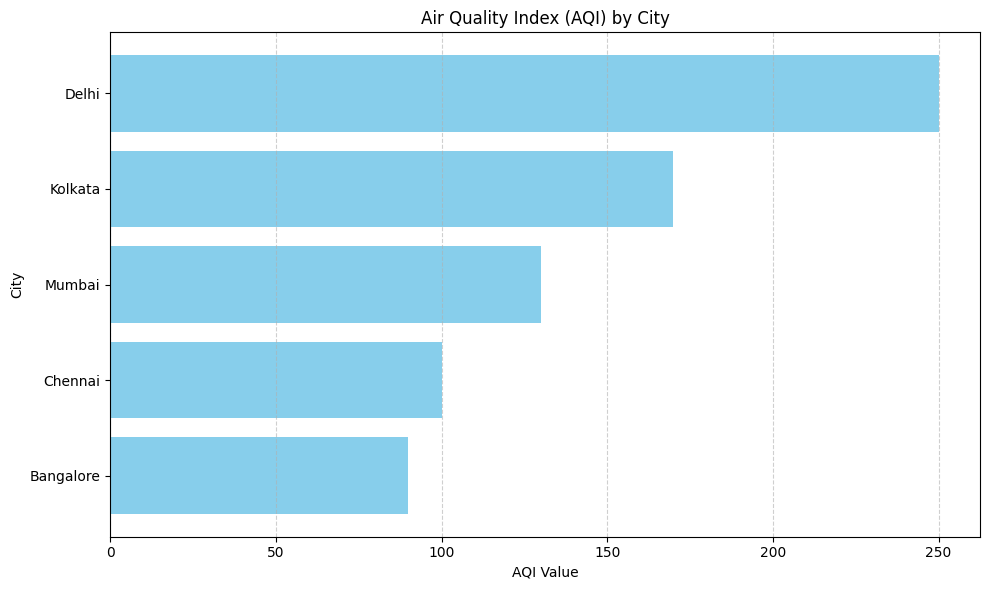

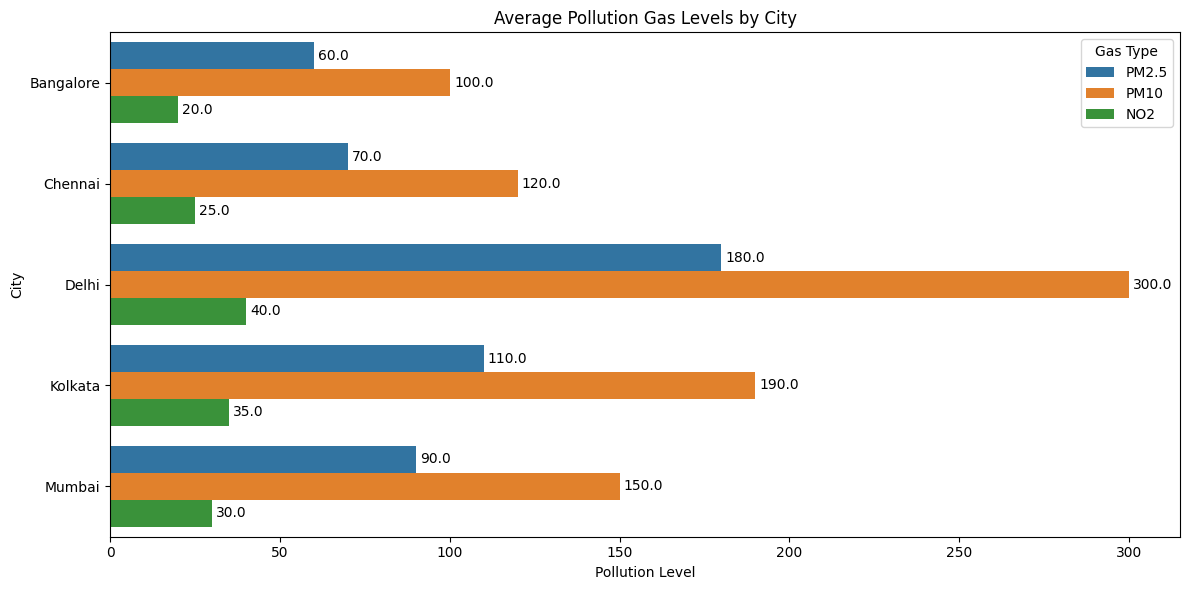

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("air_quality_data.csv")

# Clean column names (strip spaces, fix case issues)
df.columns = df.columns.str.strip()

# Filter out known non-gas columns
non_gas_columns = ['City', 'AQI', 'Date', 'Time']
gas_columns = [col for col in df.columns if col not in non_gas_columns]

# Convert gas columns to numeric
for gas in gas_columns:
    df[gas] = pd.to_numeric(df[gas], errors='coerce')

# Drop rows without city
df = df.dropna(subset=['City'])

# AQI by City - Bar Chart
if 'AQI' in df.columns:
    df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
    df_sorted = df.sort_values(by='AQI', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted['City'], df_sorted['AQI'], color='skyblue')
    plt.xlabel("AQI Value")
    plt.ylabel("City")
    plt.title("Air Quality Index (AQI) by City")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Pollution Level (Gas) by City
# Group and calculate average gas levels
city_avg = df.groupby("City")[gas_columns].mean().reset_index()

# Melt the data for plotting
melted_df = city_avg.melt(id_vars='City', var_name='Gas', value_name='Level')

# Plot with city on Y, gas on hue
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_df, x='Level', y='City', hue='Gas')

# Add values on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Average Pollution Gas Levels by City")
plt.xlabel("Pollution Level")
plt.ylabel("City")
plt.legend(title='Gas Type')
plt.tight_layout()
plt.show()